In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === 1) Charger le dataset ===
df = pd.read_csv("Daily_precipitation.csv")
df

,time,mean_TRMM_3B42
0,2015-01-01,11.851549
1,2015-01-02,0.000000
2,2015-01-03,0.000000
3,2015-01-04,2.437414
4,2015-01-05,0.290902
...,...,...
1820,2019-12-26,6.915420
1821,2019-12-27,82.286079
1822,2019-12-28,3.293426
1823,2019-12-29,21.633821


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
#radom forest
from sklearn.ensemble import RandomForestRegressor


series = df["mean_TRMM_3B42"].values

# === Fonction de création de fenêtre ===
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_dataset(series, window_size)

# === Split train / test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# === Régression Linéaire ===
model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# === Evaluation ===
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
#r²
print("R² :", model.score(X_test, y_test))

MAE : 10.90229079293419
RMSE: 15.974610251737001
R² : -0.017985179591138545


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

series = df["mean_TRMM_3B42"].values

# === Fonction de création de fenêtre ===
def create_dataset(data, window_size=5):
    X, y = [], []
    for i in range(len(data)-window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 4
X, y = create_dataset(series, window_size)

# === Split train / test ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False)

# === 4) Modèle Random Forest ===
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred = model.predict(X_test)

# === Evaluation ===
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
#r²
print("R² :", rf.score(X_test, y_test))

MAE : 10.777178471046842
RMSE: 15.783544665440825
R² : -0.005543511474915386


In [14]:
df = df.sort_values('time').reset_index(drop=True)

# Target
target_col = 'mean_TRMM_3B42'

# Fonction pour créer les séries temporelles avec une fenêtre glissante
def create_lag_features(data, target, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[target].values[i-window_size:i])
        y.append(data[target].values[i])
    return np.array(X), np.array(y)


R² Univariate: -0.3425


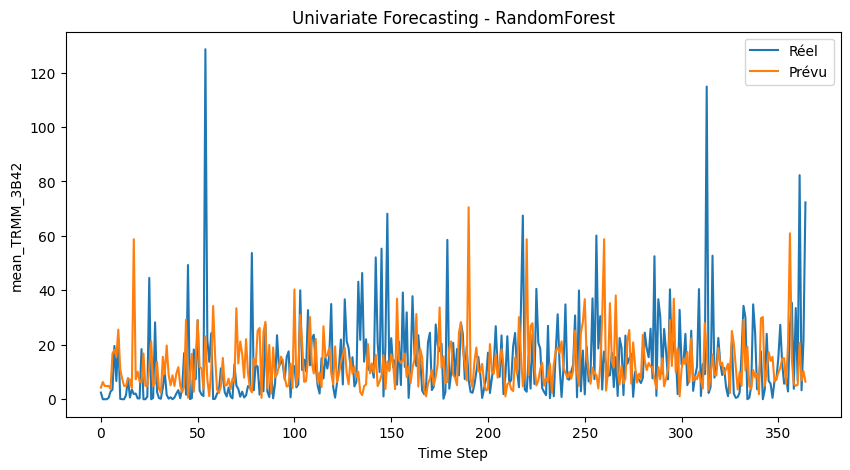

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


# Fonction pour créer les séries temporelles avec une fenêtre glissante
def create_lag_features(data, target, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[target].values[i-window_size:i])
        y.append(data[target].values[i])
    return np.array(X), np.array(y)


# Paramètre : taille de la fenêtre
window_size = 1  # tu peux changer# Paramètre : taille de la fenêtre
  # tu peux changer
X_uni, y_uni = create_lag_features(df, target_col, window_size)

# Split train/test
split_idx = int(len(X_uni)*0.8)
X_train, X_test = X_uni[:split_idx], X_uni[split_idx:]
y_train, y_test = y_uni[:split_idx], y_uni[split_idx:]

# Modèle
rf_uni = RandomForestRegressor(n_estimators=100, random_state=42)
rf_uni.fit(X_train, y_train)

# Prédiction
y_pred_uni = rf_uni.predict(X_test)

# Évaluation
r2_uni = r2_score(y_test, y_pred_uni)
print(f"R² Univariate: {r2_uni:.4f}")

# Courbe d'amélioration
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Réel")
plt.plot(range(len(y_test)), y_pred_uni, label="Prévu")
plt.title("Univariate Forecasting - RandomForest")
plt.xlabel("Time Step")
plt.ylabel(target_col)
plt.legend()
plt.show()



In [ ]:
def predict_and_evaluate(model, data, target, window_size, n_steps):
    """
    Prédit les n_steps prochains points et calcule le R² par rapport aux valeurs réelles
    Args:
        model : RandomForestRegressor entraîné
        data : dataframe avec la colonne target
        target : nom de la colonne target
        window_size : taille de la fenêtre
        n_steps : nombre de points à prédire
    Returns:
        predictions : liste des valeurs prédites
        r2 : R² par rapport aux valeurs réelles
    """
    # Les dernières valeurs connues pour commencer la prédiction
    last_window = data[target].values[-window_size-n_steps:-n_steps].tolist()  # window avant n_steps
    real_values = data[target].values[-n_steps:]  # valeurs réelles à comparer
    predictions = []

    for _ in range(n_steps):
        X_input = np.array(last_window[-window_size:]).reshape(1, -1)
        y_pred = model.predict(X_input)[0]
        predictions.append(y_pred)
        last_window.append(y_pred)

    r2 = r2_score(real_values, predictions)
    return predictions, r2
n_steps = 4
future_preds, r2_future = predict_and_evaluate(rf_uni, df, target_col, window_size, n_steps)

print(f"Les {n_steps} prochains points prédits :", future_preds)
print(f"R² pour ces {n_steps} points :", r2_future)